In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno
from scipy.stats import chi2_contingency

In [2]:
X_train = pd.read_csv("../../data/training_set_features.csv")
Y_train = pd.read_csv("../../data/training_set_labels.csv")

features = list(X_train)[1:]
targets = list(Y_train)[1:]

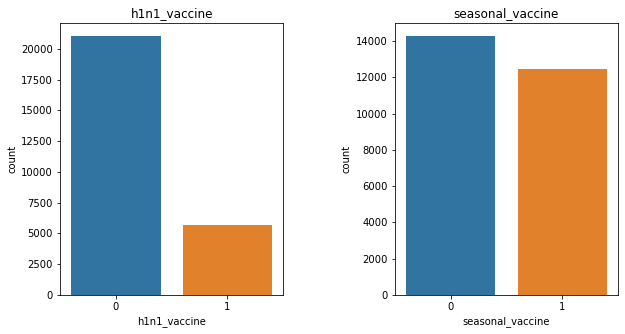

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=len(targets), figsize=(10, 5))
fig.subplots_adjust(wspace=0.5)
i = 0
for target in targets:
    sns.countplot(data=Y_train, x=target, ax=ax[i])
    ax[i].set_title(target)
    i += 1

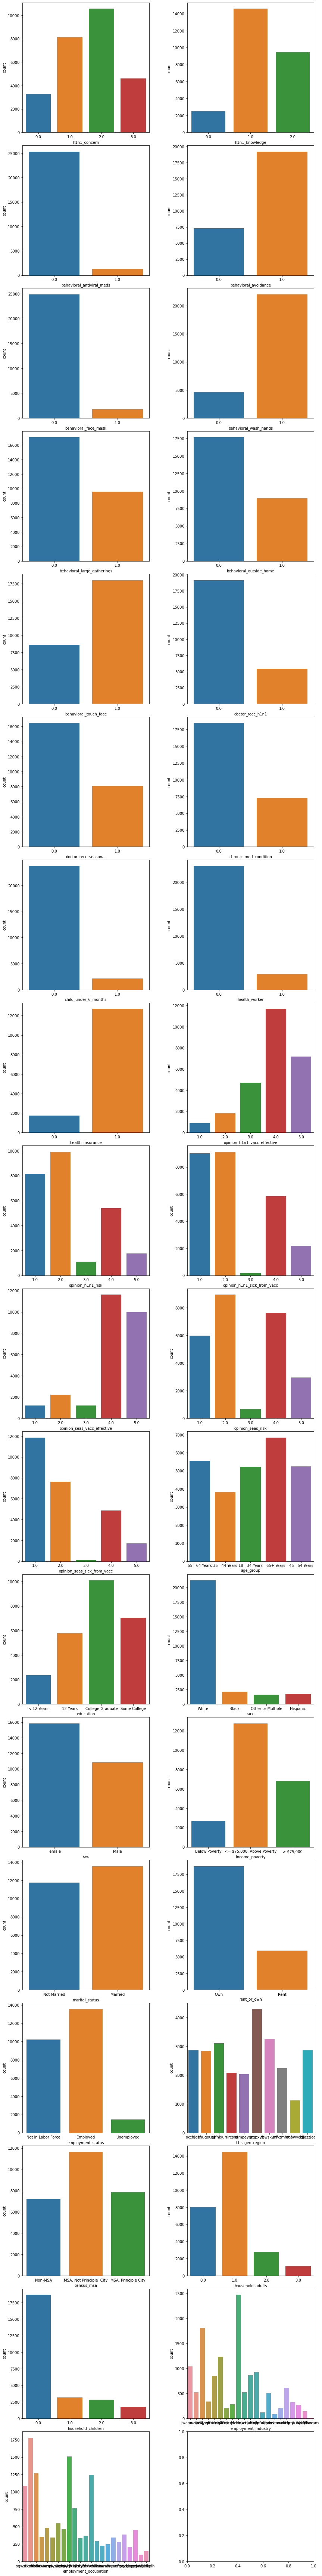

In [6]:
nrows = int(np.ceil(len(features) / 2))
ncols = 2
fig, axs = plt.subplots(nrows=nrows,
                        ncols=ncols,
                        figsize=(7 * ncols, 7 * nrows))
fig.subplots_adjust(hspace = .1, wspace=.3)

axs = axs.ravel()
i = 0
for feature in features:
    sns.countplot(data=X_train, x=feature, ax=axs[i])
    i += 1

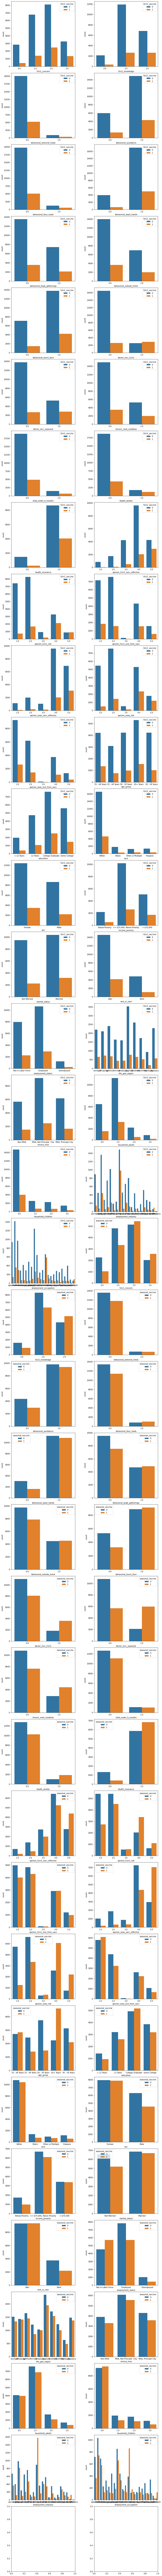

In [7]:
df_train = pd.merge(X_train, Y_train, on='respondent_id')

nrows = 2 * int(np.ceil(len(features) / 2))
ncols = 2
fig, axs = plt.subplots(nrows=nrows,
                        ncols=ncols,
                        figsize=(7 * ncols, 7 * nrows))
fig.subplots_adjust(hspace = .1, wspace=.3)

axs = axs.ravel()
i = 0
for target in targets:
    for feature in features:
        sns.countplot(data=df_train, x=feature, hue=target, ax=axs[i])
        i += 1

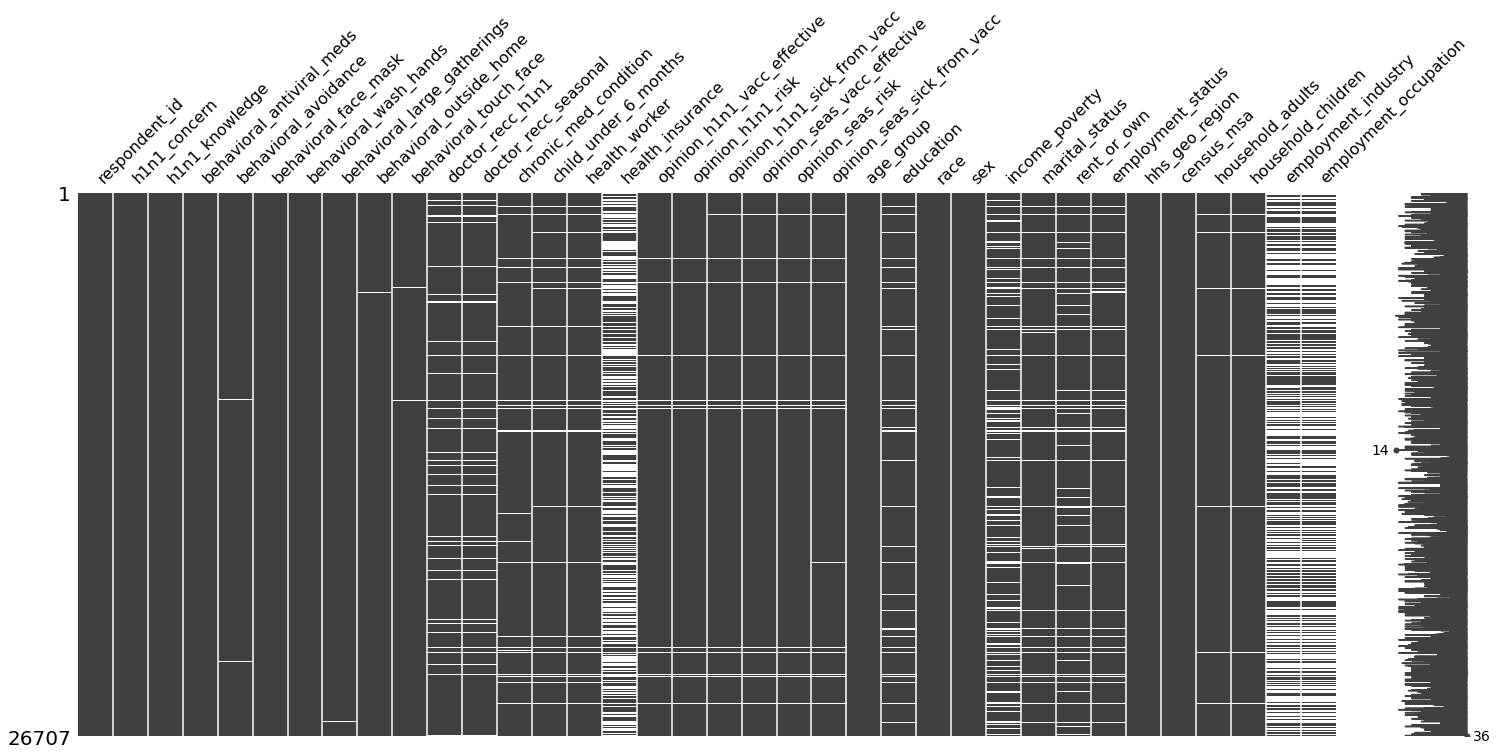

In [8]:
msno.matrix(X_train)

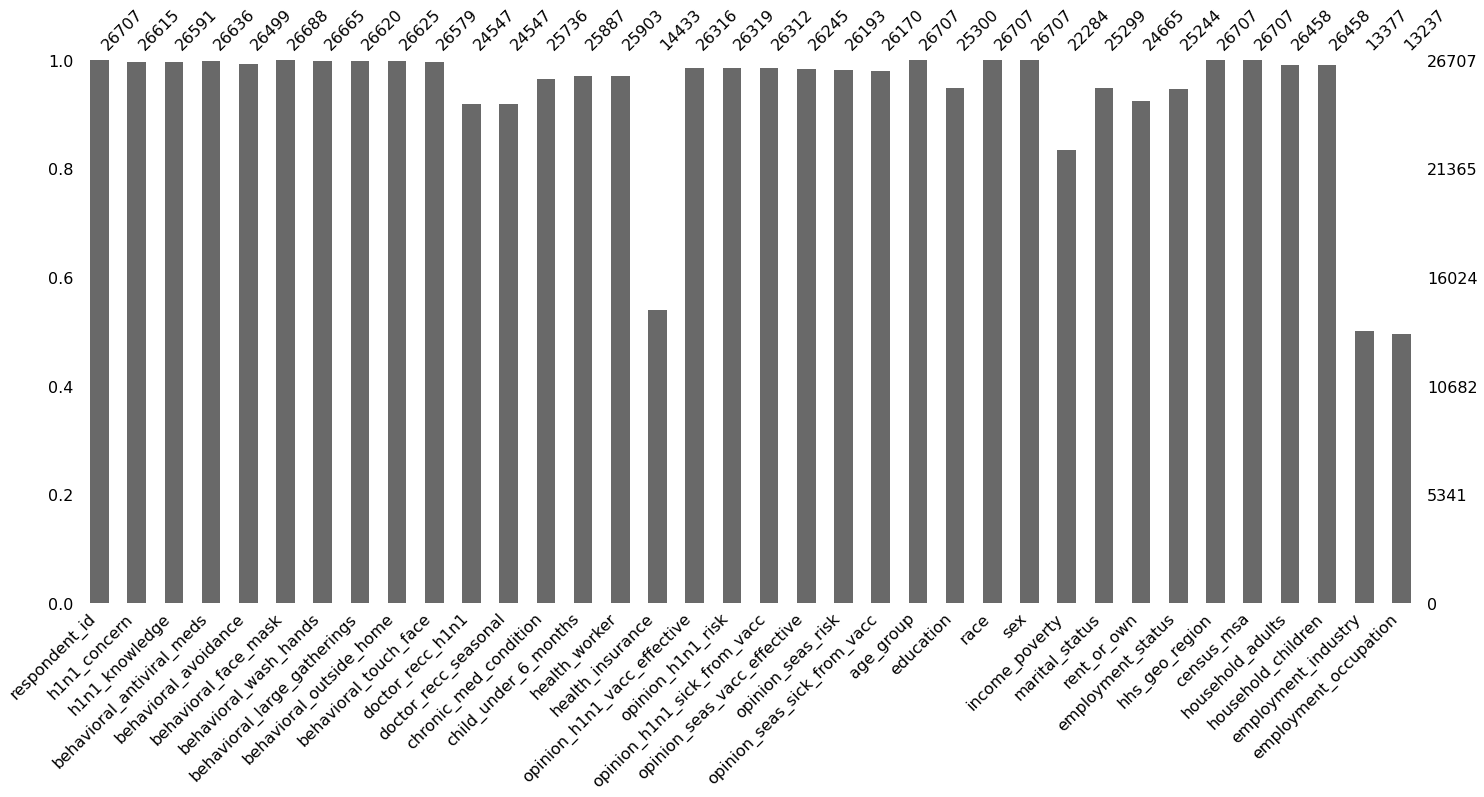

In [9]:
msno.bar(X_train)

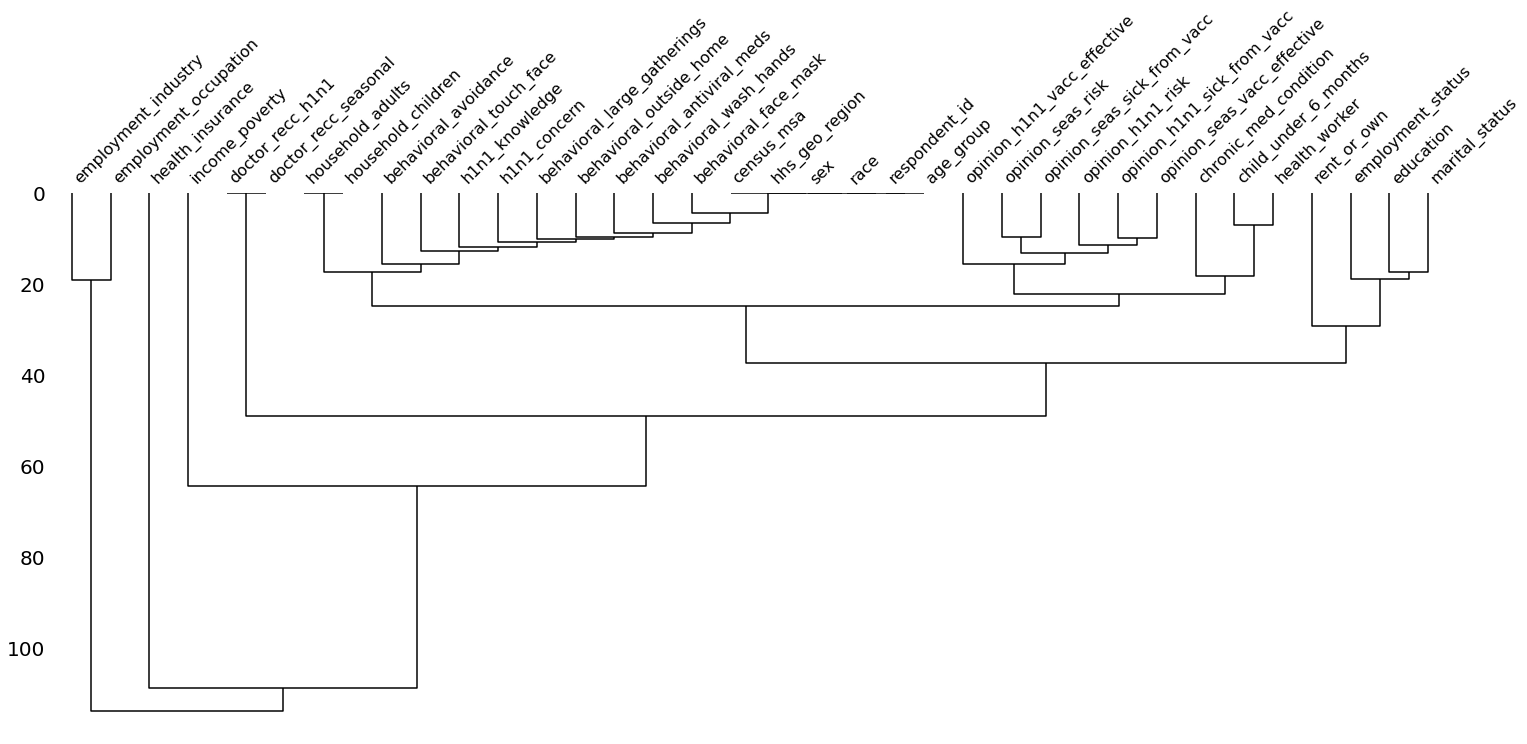

In [10]:
msno.dendrogram(X_train)

In [56]:
chi2_list = []
for target in targets:
    for feature in features:
        contingency = pd.crosstab(df_train[feature], df_train[target])
        _, pvalue, _, _ = chi2_contingency(contingency)
        chi2_list.append([target, feature, pvalue])
        
chi2_df = pd.DataFrame(chi2_list, columns=['target', 'feature', 'pvalue'])

In [60]:
chi2_df

,target,feature,pvalue
0,h1n1_vaccine,h1n1_concern,1.091885e-86
1,h1n1_vaccine,h1n1_knowledge,8.631658e-87
2,h1n1_vaccine,behavioral_antiviral_meds,4.319995e-11
3,h1n1_vaccine,behavioral_avoidance,9.454102e-15
4,h1n1_vaccine,behavioral_face_mask,1.528632e-30
...,...,...,...
65,seasonal_vaccine,census_msa,1.156860e-03
66,seasonal_vaccine,household_adults,2.650828e-28
67,seasonal_vaccine,household_children,7.894143e-85
68,seasonal_vaccine,employment_industry,6.730165e-186


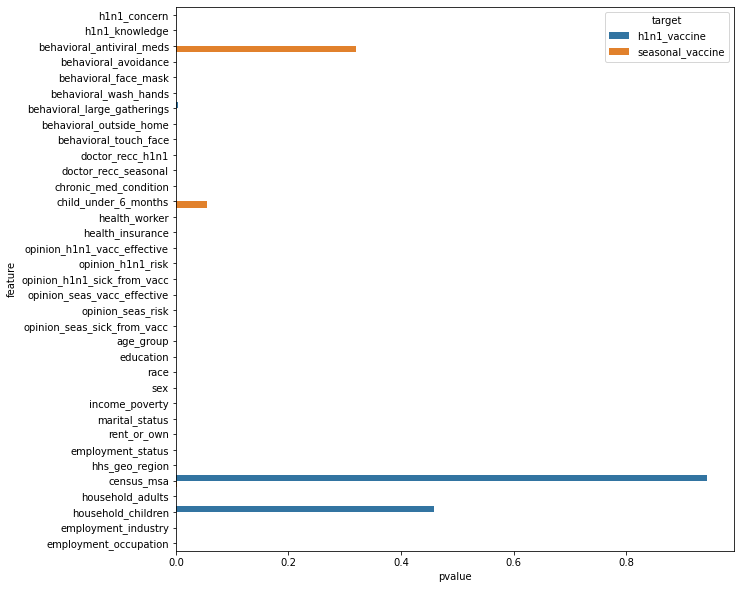

In [70]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=chi2_df, y='feature', x='pvalue', hue='target', ax=ax)
plt.show()